In [1]:
from pybaseball import statcast_batter, playerid_lookup
import altair as alt
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999

In [2]:
playerid_lookup("edman","tommy")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,edman,tommy,669242,NaN,edmanto01,19470,2019.0,2019.0


In [3]:
from bs4 import BeautifulSoup, Comment
import requests

In [4]:
edman_game_by_game = 'https://www.fangraphs.com/statsd.aspx?playerid=19470&position=2B/3B&gds=&gde=&season=2019&type=1'
page = requests.get(edman_game_by_game)
soup = BeautifulSoup(page.text, 'html.parser')
found = soup.find('table',{'class':'rgMasterTable', 'id':'DailyStats1_dgSeason1_ctl00'})
raw_df=pd.read_html(str(found))[0]

In [5]:
raw_df.head()

,Date,Team,Opp,BO,Pos,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,Total,- - -,- - -,- - -,- - -,91,322,344,99,64,17,7,11,58,36,15,0,61,7,0,0,3,15,1,.307
1,Date,Team,Opp,BO,Pos,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
2,2019-09-28,STL,CHC,2,2B,1,4,5,2,1,0,1,0,0,3,0,0,1,1,0,0,0,0,0,.500
3,2019-09-27,STL,CHC,2,2B,1,4,5,3,2,1,0,0,1,0,1,0,0,0,0,0,0,1,0,.750
4,2019-09-25,STL,@ARI,1,3B,1,4,5,2,2,0,0,0,2,0,0,0,1,1,0,0,0,0,0,.500


In [6]:
#Clean
stats_df = raw_df[raw_df["BO"].apply(lambda x: x.isnumeric())]
stats_df = stats_df.iloc[::-1]

stats_df = stats_df.reset_index()
stats_df["game_no"]=stats_df.index+1

In [7]:
stats_df.iloc[len(stats_df)-1]

index               2
Date       2019-09-28
Team              STL
Opp               CHC
BO                  2
Pos                2B
G                   1
AB                  4
PA                  5
H                   2
1B                  1
2B                  0
3B                  1
HR                  0
R                   0
RBI                 3
BB                  0
IBB                 0
SO                  1
HBP                 1
SF                  0
SH                  0
GDP                 0
SB                  0
CS                  0
AVG              .500
game_no            91
Name: 90, dtype: object

In [8]:
# ADD TODAYS:
stats_df = stats_df.append({
    "H":0,
    "AB": 4,
    "game_no":91,
    "Date": "2019-09-29",
}, ignore_index=True)


In [9]:
stats_df["season_BA"] =  stats_df["H"].astype(float).cumsum()/stats_df["AB"].astype(float).cumsum()

In [10]:
stats_df["datetime"] = pd.to_datetime(stats_df["Date"])
dt = stats_df.set_index("datetime")

In [11]:
stats_df

,index,Date,Team,Opp,BO,Pos,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,game_no,season_BA,datetime
0,96.0,2019-06-08,STL,@CHC,5,PH,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,.000,1,0.000000,2019-06-08
1,95.0,2019-06-11,STL,@MIA,9,PH-2B,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.000,2,0.000000,2019-06-11
2,94.0,2019-06-12,STL,@MIA,9,PH,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,.000,3,0.000000,2019-06-12
3,93.0,2019-06-14,STL,@NYM,8,2B,1,3,3,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,.333,4,0.166667,2019-06-14
4,92.0,2019-06-15,STL,@NYM,9,PH,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,.000,5,0.166667,2019-06-15
5,91.0,2019-06-19,STL,MIA,7,2B,1,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,.333,6,0.222222,2019-06-19
6,90.0,2019-06-20,STL,MIA,9,2B,1,2,2,2,1,0,0,1,1,2,0,0,0,0,0,0,0,0,0,1.000,7,0.363636,2019-06-20
7,89.0,2019-06-21,STL,LAA,9,PH,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.000,8,0.333333,2019-06-21
8,88.0,2019-06-22,STL,LAA,9,PH,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.000,9,0.307692,2019-06-22
9,87.0,2019-06-23,STL,LAA,9,PH,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000,10,0.357143,2019-06-23


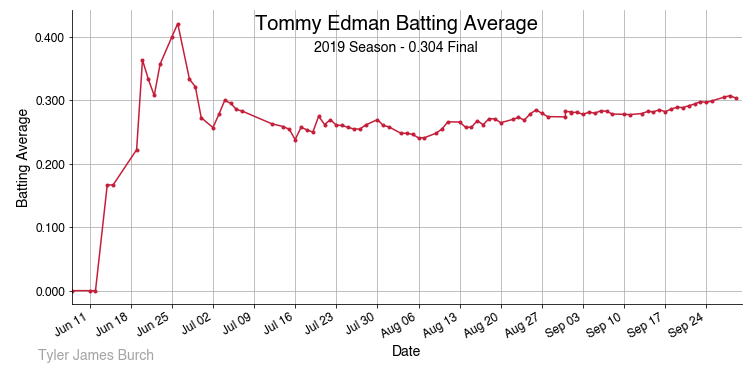

In [12]:
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import datetime as datetime

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
fmt = mdates.DateFormatter('%M-%d')

fig = plt.figure(figsize=(12,6))
ax =plt.gca()
dt.plot(y="season_BA",color="#C41E3A", ax=ax,marker=".")

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=30)
#ax.tick_params(fontsize=12)

current_ba = dt["season_BA"].iloc[-1]
current_date = dt.index[-1]

plt.figtext(.5,.835,"Tommy Edman Batting Average", fontsize=20,ha="center")
plt.figtext(.5,.785,f'2019 Season - {round(current_ba,3)} Final', fontsize=14, ha='center')
plt.annotate(s="Tyler James Burch", xy=(.05,.05), xycoords='figure fraction',
            textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)

plt.xlim(right= datetime.date(2019, 9, 30))
#plt.annotate(round(current_ba,3), xy=(current_date,current_ba),ha="right",va="bottom",fontsize=14)

plt.ylabel("Batting Average", fontsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.3f"))
plt.xlabel("Date", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.grid()

ax.get_legend().remove()
sns.despine()
plt.savefig("../plots/edman_ba")